## Part 1: Choice of Data Source

### Chosen Dataset

For this analysis, we will use the **Hotel Bookings Dataset**, which provides comprehensive booking information for two types of hotels — a city hotel and a resort hotel. The dataset includes details such as reservation status, booking channels, customer demographics, and financial information.

- **Dataset Title:** Hotel Bookings  
- **Author:** Ahmed Safwat  
- **Available at:** [Kaggle - Hotel Bookings Dataset](https://www.kaggle.com/datasets/ahmedsafwatgb20/hotel-bookingscsv)  
- **File Format:** CSV  
- **File Size:** ~1.6 MB  
- **License:** Public domain (check dataset page for any restrictions)  
- **Standard Format:** CSV — as defined by [RFC 4180](https://tools.ietf.org/html/rfc4180)

### Dataset Structure and Description

The dataset consists of **32 columns** and approximately **119,390 rows**. Each row corresponds to a unique booking, and the columns include information about:

- **Customer Details:** 
  - `adults`, `children`, `babies`, `country`, `is_repeated_guest`, `customer_type`
- **Hotel Information:** 
  - `hotel`, `assigned_room_type`, `reserved_room_type`, `booking_changes`
- **Reservation Dates:** 
  - `arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, `stays_in_week_nights`
- **Financials:** 
  - `adr` (Average Daily Rate), `deposit_type`, `required_car_parking_spaces`, `total_of_special_requests`
- **Booking Channel:** 
  - `distribution_channel`, `market_segment`, `agent`, `company`
- **Target Variable:** 
  - `is_canceled` (1 if canceled, 0 otherwise)

### Potential Challenges and Data Quality Issues

Before analysis, several data preprocessing tasks may be necessary due to the following quirks:

1. **Missing Values:**  
   - Columns like `agent`, `company`, and `children` contain missing values.
   - Need for imputation or exclusion based on the use case.

2. **Categorical Variables:**  
   - Variables like `hotel`, `meal`, and `market_segment` are strings.
   - Need to encode these as numerical values for modeling.

3. **Date Columns:**  
   - Date components are split across multiple columns.
   - Will need to be combined into a single datetime format for analysis.

4. **Class Imbalance:**  
   - The `is_canceled` target column may be imbalanced.
   - May require balancing techniques (e.g., SMOTE, stratified sampling).

5. **Anomalies and Outliers:**  
   - Bookings with zero guests or abnormally high `adr` values could skew analysis.

6. **Potential Data Leakage:**  
   - Columns like `reservation_status` and `reservation_status_date` might leak information about the final outcome and should be excluded from predictive models.

### Conclusion

This dataset is ideal for performing both exploratory and predictive data analysis. It is sufficiently large to uncover meaningful patterns and trends while still small enough to work with efficiently in local environments.

### Citation

> Safwat, Ahmed. “Hotel Bookings.” *Kaggle*,  
> [https://www.kaggle.com/datasets/ahmedsafwatgb20/hotel-bookingscsv](https://www.kaggle.com/datasets/ahmedsafwatgb20/hotel-bookingscsv),  
> Accessed May 10, 2025.


## Part 2: Choice of Frameworks

To process, analyze, and visualize the Hotel Bookings dataset, I have investigated several data analysis and visualization frameworks commonly used in Python-based environments. The tools I selected support CSV data natively and are well-suited for tasks involving data cleaning, exploratory analysis, and visual storytelling.

### 🧰 Frameworks Considered

| Framework          | Purpose                  | Pros                                                                 | Cons                                                              |
|--------------------|---------------------------|----------------------------------------------------------------------|-------------------------------------------------------------------|
| **Pandas**         | Data manipulation         | - Powerful for tabular data<br>- Supports CSV natively<br>- Rich API for filtering, grouping, merging | - Can become slow with very large datasets (>1GB)                |
| **NumPy**          | Numerical computations    | - Fast matrix operations<br>- Seamless integration with Pandas      | - Not ideal for tabular or labeled data                          |
| **Matplotlib**     | Basic plotting            | - Highly customizable<br>- Works well for static visualizations     | - Verbose syntax<br>- Not ideal for interactive charts           |
| **Seaborn**        | Statistical plotting      | - Built on Matplotlib<br>- Beautiful default themes<br>- Great for distributions and heatmaps | - Limited interactivity                                           |
| **Plotly**         | Interactive visualization | - Interactive & zoomable plots<br>- HTML export capability          | - Slightly heavier & less customizable than Matplotlib for styling |
| **Scikit-learn**   | Machine Learning          | - Industry-standard for ML models<br>- Good preprocessing tools     | - Not designed for deep learning or GPU acceleration             |

---

### ✅ Selected Frameworks for This Project

For this project, I will primarily use the following frameworks:

- **Pandas** for loading the CSV data and performing all data wrangling, filtering, aggregation, and cleaning operations.
- **Seaborn** and **Matplotlib** for data visualization — particularly to analyze correlations, distributions, and categorical relationships.
- **Plotly** (optional) for creating interactive visualizations (e.g., drill-down charts or dashboards).
- **Scikit-learn** for optional classification tasks such as predicting reservation cancellations based on booking features.

---

### 🔄 Framework Interoperability

These frameworks are designed to work together efficiently:

- **Pandas** DataFrames serve as the primary data structure and are directly compatible with **Seaborn**, **Matplotlib**, **Plotly**, and **Scikit-learn**.
- **Seaborn** and **Matplotlib** share the same plotting backend, making them interchangeable in many cases.
- **Plotly** can take in Pandas DataFrames directly for generating visualizations.

---

### 📄 Data Loading

Since the dataset is in **CSV format**, it can be easily loaded using:

```python
import pandas as pd

df = pd.read_csv('hotel_bookings.csv')

# PART 3: Load the Hotel Bookings dataset from Kaggle

In [1]:
# Install required packages
!pip install -q pandas matplotlib seaborn plotly
!pip install -q kagglehub


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# Import necessary modules
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Dataset ID from Kaggle
dataset_id = "qucwang/hotel-bookings-analysis-dataset"
file_path = "hotel_bookings.csv"  # Ensure this matches the actual file name in the dataset

# Load the dataset into a Pandas DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    dataset_id,
    file_path
)

# Display basic information about the dataset
print("Shape of dataset (rows, columns):", df.shape)
print("Total number of records:", len(df))

# Optionally preview the data
df.head()


/Users/muhammadsajjad/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/k2/yd0rj6gs1ws2cp27vz73psz80000gn/T/ipykernel_54951/3689702682.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


Shape of dataset (rows, columns): (119390, 32)
Total number of records: 119390


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Part 4: Cleaning the Data

Upon initial inspection of the dataset, several data quality issues were identified. To prepare the data for analysis, we must resolve the following:

### Observed Issues:
1. **Missing Values:**
   - Columns like `children`, `agent`, `company`, and `country` contain missing values (`NaN`).
2. **Incorrect Data Types:**
   - Columns such as `reservation_status_date` should be in datetime format.
3. **Unrealistic Entries:**
   - Some rows report 0 adults, children, and babies — indicating no guests.
4. **Date Information is Split:**
   - Date columns are split into `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month`.
5. **Categorical Features:**
   - Many string-based categorical columns may need encoding or normalization later.
6. **Duplicates:**
   - Dataset might contain exact duplicate rows.

### Cleaning Steps:
- Drop rows with impossible guest totals (0 adults, children, and babies).
- Fill missing values where appropriate or drop irrelevant columns.
- Combine arrival date columns into a single `arrival_date` column.
- Convert date strings into datetime objects.
- Drop duplicate rows.
- Ensure data types are correctly set for further analysis.

These steps aim to make the dataset more reliable and analysis-ready while maintaining generality for similar datasets.

In [3]:
import numpy as np
import pandas as pd

# 1. Drop rows where there are no guests at all (0 adults, 0 children, 0 babies)
df = df[~((df['adults'] == 0) & (df['children'].fillna(0) == 0) & (df['babies'] == 0))]

# 2. Fill missing values
df['children'] = df['children'].fillna(0)  # Assume 0 if missing
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0).astype(int)  # 0 as 'no agent'
df['company'] = df['company'].fillna(0).astype(int)  # 0 as 'no company'

# 3. Combine year, month, and day columns into one datetime column
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)

# 4. Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# 5. Drop duplicates
df = df.drop_duplicates()

# 6. Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# 7. Optional: Drop columns no longer needed
# (keeping them for now unless analysis proves them redundant)

# 8. Summary of cleaned dataset
print("Shape after cleaning:", df.shape)
print("Remaining missing values:\n", df.isnull().sum().sort_values(ascending=False).head())

# Preview cleaned data
df.head()


Shape after cleaning: (87230, 33)
Remaining missing values:
 hotel                        0
previous_cancellations       0
reservation_status_date      0
reservation_status           0
total_of_special_requests    0
dtype: int64


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


## Part 5: Fundamental Exploration

In this section, we perform a comprehensive statistical analysis of the dataset, exploring the following:

### 1. Numerical Data:
For each numerical column, we will:
- Compute the **minimum**, **maximum**, **mean**, and **standard deviation**.
- Identify the **locations** (i.e., row indices) where the minimum and maximum values occur.

### 2. Categorical Data:
For categorical columns, we will:
- Count the **frequency** of each category.
- Visualize the distribution of categories where relevant.

### 3. Time/Date Data:
For time-related columns:
- Examine the **covered timespan** (earliest to latest date).
- Calculate the **average frequency** of events.

### 4. Other Data Types:
For any other types of data (e.g., Boolean or specialized formats), we will provide suitable statistical insights.

This will give us a clearer understanding of the dataset's structure and its key properties, ensuring that we can proceed with further analysis effectively.


In [4]:
# PART 5: Fundamental Exploration

# 1. Numerical Data Analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Summary statistics for numerical data
numerical_summary = df[numerical_cols].describe().transpose()

# Additional statistics for numerical data (min/max location and mean/std)
for col in numerical_cols:
    print(f"\n{col} Analysis:")
    print(f" - Min value: {df[col].min()} (at index {df[col].idxmin()})")
    print(f" - Max value: {df[col].max()} (at index {df[col].idxmax()})")
    print(f" - Mean: {df[col].mean():.2f}")
    print(f" - Standard Deviation: {df[col].std():.2f}")
    
# Display the summary of numerical statistics
numerical_summary[['min', 'max', 'mean', 'std']]

# 2. Categorical Data Analysis
categorical_cols = df.select_dtypes(include=[object]).columns

# Frequency counts for categorical columns
categorical_summary = pd.DataFrame({col: df[col].value_counts() for col in categorical_cols})

# Display the frequency tables for categorical columns
categorical_summary

# 3. Date/Time Data Analysis
# For columns related to dates, like `arrival_date` and `reservation_status_date`
date_cols = ['arrival_date', 'reservation_status_date']

# Check time span for arrival_date
time_span = df['arrival_date'].min(), df['arrival_date'].max()

# Calculate the frequency of events based on arrival_date
df['arrival_date'] = pd.to_datetime(df['arrival_date'])  # Ensure it's a datetime type
arrival_frequency = df['arrival_date'].value_counts().sort_index()

# Time span and frequency summary
print(f"\nTimespan covered by 'arrival_date': {time_span}")
print(f"Average frequency of events per day: {arrival_frequency.count() / (arrival_frequency.index.max() - arrival_frequency.index.min()).days:.2f} events/day")

# Display the first few rows of arrival frequency
arrival_frequency.head()

# 4. Other Data Type Analysis
# For boolean-like columns such as `is_canceled`
bool_cols = ['is_canceled']

# Frequency counts for boolean columns
for col in bool_cols:
    print(f"\n{col} Analysis:")
    print(df[col].value_counts())



is_canceled Analysis:
 - Min value: 0 (at index 0)
 - Max value: 1 (at index 7)
 - Mean: 0.28
 - Standard Deviation: 0.45

lead_time Analysis:
 - Min value: 0 (at index 5)
 - Max value: 737 (at index 1)
 - Mean: 79.97
 - Standard Deviation: 86.06

arrival_date_year Analysis:
 - Min value: 2015 (at index 0)
 - Max value: 2017 (at index 7334)
 - Mean: 2016.21
 - Standard Deviation: 0.69

arrival_date_week_number Analysis:
 - Min value: 1 (at index 3122)
 - Max value: 53 (at index 3046)
 - Mean: 26.84
 - Standard Deviation: 13.67

arrival_date_day_of_month Analysis:
 - Min value: 1 (at index 0)
 - Max value: 31 (at index 768)
 - Mean: 15.82
 - Standard Deviation: 8.84

stays_in_weekend_nights Analysis:
 - Min value: 0 (at index 0)
 - Max value: 19 (at index 10819)
 - Mean: 1.00
 - Standard Deviation: 1.03

stays_in_week_nights Analysis:
 - Min value: 0 (at index 0)
 - Max value: 50 (at index 10819)
 - Mean: 2.62
 - Standard Deviation: 2.04

adults Analysis:
 - Min value: 0 (at index 3443

## Part 6: Visualization

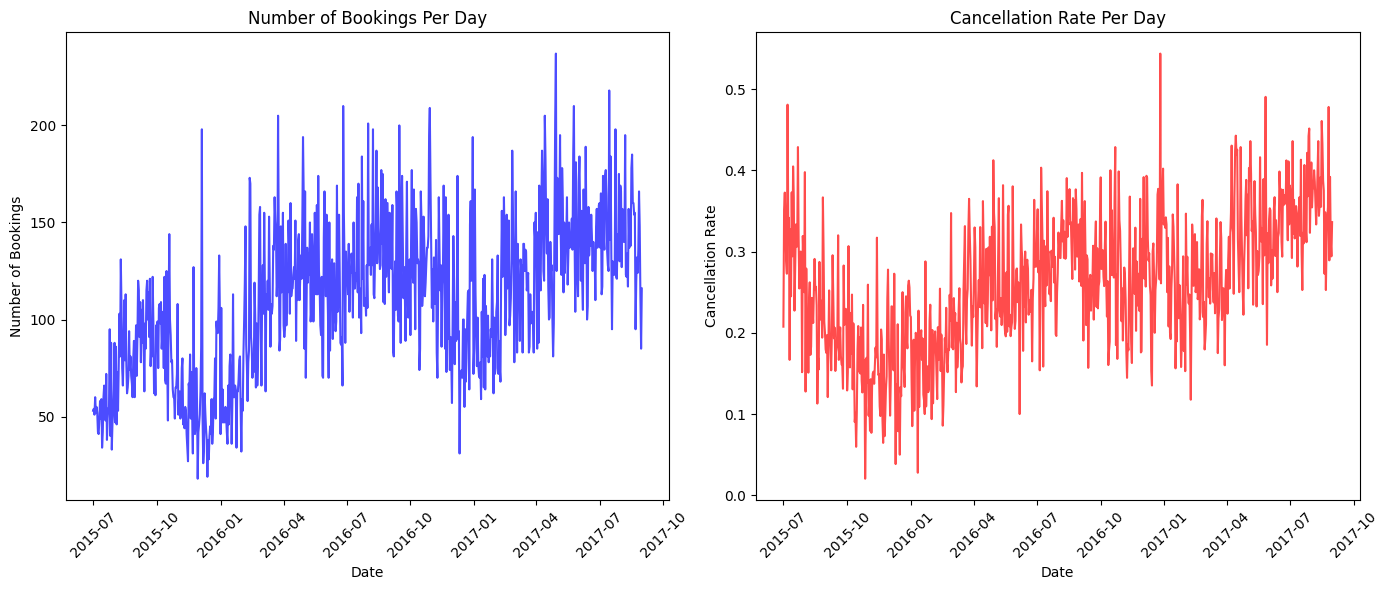

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert `arrival_date` to datetime type (if not already done)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

# Group by date to get the number of bookings per day
daily_bookings = df.groupby('arrival_date').size()

# Calculate cancellation rate per day
daily_cancellations = df.groupby('arrival_date')['is_canceled'].mean()

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Plot the daily bookings count
plt.subplot(1, 2, 1)
plt.plot(daily_bookings.index, daily_bookings.values, color='b', label='Bookings', alpha=0.7)
plt.title('Number of Bookings Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

# Plot the cancellation rate over time
plt.subplot(1, 2, 2)
plt.plot(daily_cancellations.index, daily_cancellations.values, color='r', label='Cancellation Rate', alpha=0.7)
plt.title('Cancellation Rate Per Day')
plt.xlabel('Date')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


## Part 7: Bonus: Highlight :

Extreme low lead time (min value):               hotel  is_canceled  lead_time  arrival_date_year  \
5      Resort Hotel            0          0               2015   
17     Resort Hotel            0          0               2015   
53     Resort Hotel            0          0               2015   
54     Resort Hotel            0          0               2015   
55     Resort Hotel            0          0               2015   
...             ...          ...        ...                ...   
87045    City Hotel            0          0               2017   
87046    City Hotel            0          0               2017   
87059    City Hotel            0          0               2017   
87074    City Hotel            0          0               2017   
87124    City Hotel            0          0               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
5                   July                        27                          1   
17        

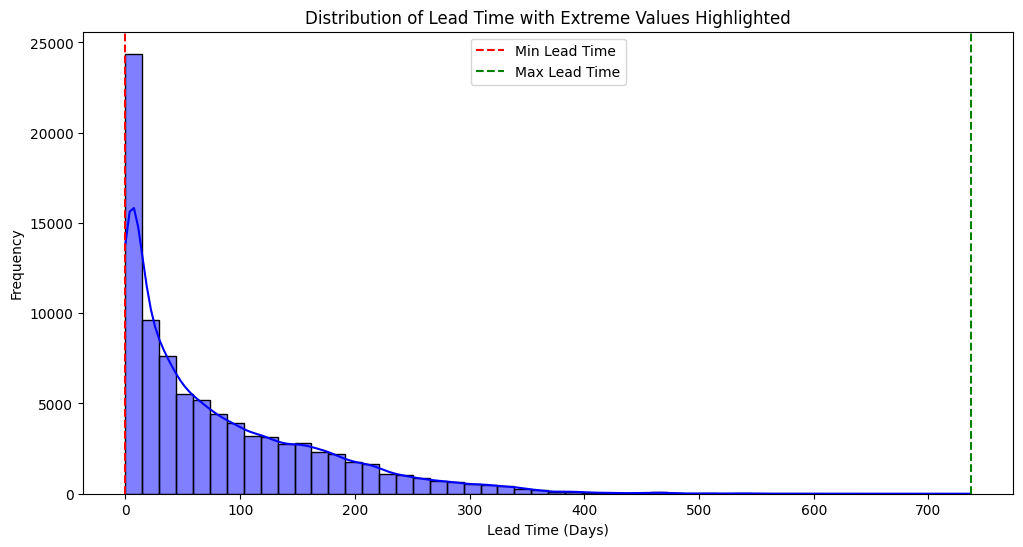

/var/folders/k2/yd0rj6gs1ws2cp27vz73psz80000gn/T/ipykernel_54951/1272631377.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='Set2')


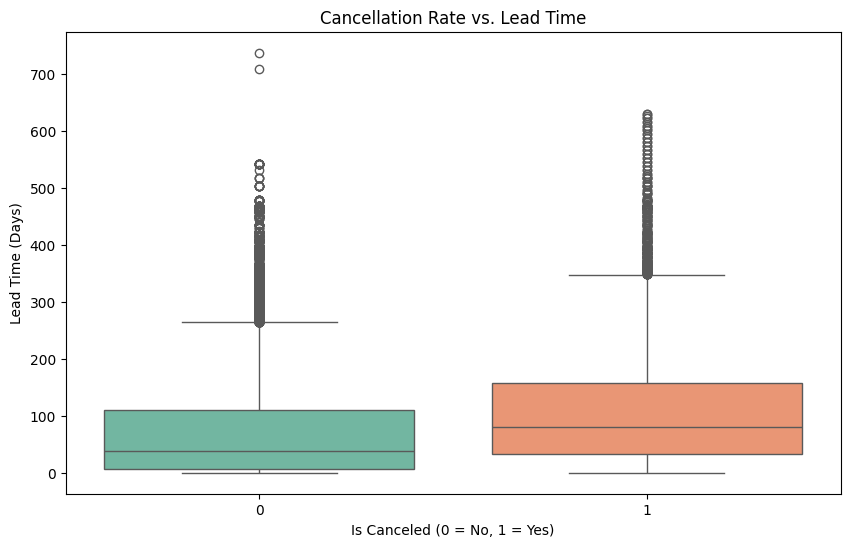

In [6]:
# Step 1: Identifying extreme lead time values
extreme_lead_time_low = df[df['lead_time'] == df['lead_time'].min()]
extreme_lead_time_high = df[df['lead_time'] == df['lead_time'].max()]

# Checking statistics of the extreme values
print("Extreme low lead time (min value):", extreme_lead_time_low)
print("Extreme high lead time (max value):", extreme_lead_time_high)

# Step 2: Correlation between 'is_canceled' and 'lead_time'
correlation = df[['is_canceled', 'lead_time']].corr()
print("\nCorrelation between 'is_canceled' and 'lead_time':")
print(correlation)

# Step 3: Visualizing the extreme lead time cases and the cancellation correlation

# Visualizing lead time distribution with extreme values highlighted
plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.axvline(extreme_lead_time_low['lead_time'].values[0], color='red', linestyle='--', label='Min Lead Time')
plt.axvline(extreme_lead_time_high['lead_time'].values[0], color='green', linestyle='--', label='Max Lead Time')
plt.title('Distribution of Lead Time with Extreme Values Highlighted')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualizing the correlation between cancellations and lead time
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='Set2')
plt.title('Cancellation Rate vs. Lead Time')
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Lead Time (Days)')
plt.show()


### 🛡️ License
This project is licensed under the [MIT License](https://opensource.org/licenses/MIT).


MIT License

Copyright (c) 2025 Muhammad Sajjad Saleem

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the “Software”), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.